# Exercice 2

# Data Cleaning + EDA

In [189]:
%matplotlib inline
import numpy as np
!pip uninstall pandas-profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas as pd
import numpy as np
import zipfile
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import IPython
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [190]:
data_file_path = 'air_quality.csv'
full_data = pd.read_csv(data_file_path, sep=';')

In [191]:
full_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
print(f"Nulls in Unnamed: 15: {full_data['Unnamed: 15'].isnull().sum()/len(full_data)*100}%")
print(f"Nulls in Unnamed: 16: {full_data['Unnamed: 16'].isnull().sum()/len(full_data)*100}%")

Nulls in Unnamed: 15: 100.0%
Nulls in Unnamed: 16: 100.0%


In [193]:
full_data = full_data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [194]:
mask = full_data.isna().all(axis=1)
all_nan_rows = full_data[mask]
all_nan_rows

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
full_data = full_data[~mask]

In [196]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [197]:
profile = ProfileReport(
    full_data,
    title = "Simple Linear Regression - Precleaning Report",
    html  = {'style': {'full_width': True}},
    sort  = None)
profile.to_file(output_file='Precleaning.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 26.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [198]:
for col in full_data.select_dtypes(include='number'):
    if col == "Date" or col == "Time":
        continue
    print(f"Column: {col}")
    negative_values = full_data[full_data[col] < 0]

Column: PT08.S1(CO)
Column: NMHC(GT)
Column: PT08.S2(NMHC)
Column: NOx(GT)
Column: PT08.S3(NOx)
Column: NO2(GT)
Column: PT08.S4(NO2)
Column: PT08.S5(O3)


In [199]:
negative_values

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,01/04/2004,14.00.00,"1,7",-200.0,222.0,"-200,0",-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200,-200,-200
525,01/04/2004,15.00.00,"1,9",-200.0,197.0,"-200,0",-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200,-200,-200
526,01/04/2004,16.00.00,"2,3",-200.0,319.0,"-200,0",-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200,-200,-200
701,08/04/2004,23.00.00,2,-200.0,137.0,"-200,0",-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200,-200,-200
702,09/04/2004,00.00.00,"2,4",-200.0,189.0,"-200,0",-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,11/02/2005,17.00.00,"6,6",-200.0,-200.0,"-200,0",-200.0,1227.0,-200.0,326.0,-200.0,-200.0,-200,-200,-200
8112,11/02/2005,18.00.00,"6,5",-200.0,-200.0,"-200,0",-200.0,1061.0,-200.0,284.0,-200.0,-200.0,-200,-200,-200
8113,11/02/2005,19.00.00,"7,1",-200.0,-200.0,"-200,0",-200.0,1075.0,-200.0,289.0,-200.0,-200.0,-200,-200,-200
8114,11/02/2005,20.00.00,"4,9",-200.0,-200.0,"-200,0",-200.0,641.0,-200.0,215.0,-200.0,-200.0,-200,-200,-200


In [200]:
full_data = full_data.replace(-200.0, pd.NA)
full_data = full_data.replace(-200, pd.NA)
full_data = full_data.replace("-200", pd.NA)

In [201]:
full_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,<NA>,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,<NA>,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,<NA>,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,<NA>,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


## Missing porcentage of each column

In [202]:
for col in full_data.columns:
    num_nulls = full_data[col].isnull().sum()
    if num_nulls > 0:
        print(f"Column '{col}'\t has {num_nulls} null values\t ({num_nulls/len(full_data)*100:.2f}%)")

Column 'CO(GT)'	 has 1592 null values	 (17.01%)
Column 'PT08.S1(CO)'	 has 366 null values	 (3.91%)
Column 'NMHC(GT)'	 has 8443 null values	 (90.23%)
Column 'PT08.S2(NMHC)'	 has 366 null values	 (3.91%)
Column 'NOx(GT)'	 has 1639 null values	 (17.52%)
Column 'PT08.S3(NOx)'	 has 366 null values	 (3.91%)
Column 'NO2(GT)'	 has 1642 null values	 (17.55%)
Column 'PT08.S4(NO2)'	 has 366 null values	 (3.91%)
Column 'PT08.S5(O3)'	 has 366 null values	 (3.91%)
Column 'T'	 has 366 null values	 (3.91%)
Column 'RH'	 has 366 null values	 (3.91%)
Column 'AH'	 has 366 null values	 (3.91%)


In [203]:
full_data_cleaned = full_data.drop(columns=['NMHC(GT)'])

In [204]:
full_data_cleaned

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [205]:
for col in full_data_cleaned.columns:
    num_nulls = full_data_cleaned[col].isnull().sum()
    if num_nulls > 0:
        print(f"Column '{col}'\t has {num_nulls} null values\t ({num_nulls/len(full_data_cleaned)*100:.2f}%)")

Column 'CO(GT)'	 has 1592 null values	 (17.01%)
Column 'PT08.S1(CO)'	 has 366 null values	 (3.91%)
Column 'PT08.S2(NMHC)'	 has 366 null values	 (3.91%)
Column 'NOx(GT)'	 has 1639 null values	 (17.52%)
Column 'PT08.S3(NOx)'	 has 366 null values	 (3.91%)
Column 'NO2(GT)'	 has 1642 null values	 (17.55%)
Column 'PT08.S4(NO2)'	 has 366 null values	 (3.91%)
Column 'PT08.S5(O3)'	 has 366 null values	 (3.91%)
Column 'T'	 has 366 null values	 (3.91%)
Column 'RH'	 has 366 null values	 (3.91%)
Column 'AH'	 has 366 null values	 (3.91%)


In [206]:
filas_con_nan = full_data_cleaned[full_data_cleaned.isna().any(axis=1)]
filas_con_nan


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9,11/03/2004,03.00.00,"0,6",1010.0,"1,7",561.0,<NA>,1705.0,<NA>,1235.0,501.0,"10,3","60,2","0,7517"
10,11/03/2004,04.00.00,<NA>,1011.0,"1,3",527.0,21.0,1818.0,34.0,1197.0,445.0,"10,1","60,5","0,7465"
33,12/03/2004,03.00.00,"0,8",889.0,"1,9",574.0,<NA>,1680.0,<NA>,1187.0,512.0,"7,0","62,3","0,6261"
34,12/03/2004,04.00.00,<NA>,831.0,"1,1",506.0,21.0,1893.0,32.0,1134.0,384.0,"6,1","65,9","0,6248"
39,12/03/2004,09.00.00,<NA>,1545.0,"22,1",1353.0,<NA>,767.0,<NA>,2058.0,1588.0,"9,2","56,2","0,6561"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,08/03/2005,03.00.00,"0,8",876.0,"1,9",576.0,<NA>,1040.0,<NA>,815.0,900.0,"1,0","56,7","0,3803"
8721,09/03/2005,03.00.00,"0,8",937.0,"2,2",600.0,<NA>,985.0,<NA>,873.0,885.0,"4,7","53,1","0,4589"
8745,10/03/2005,03.00.00,"1,1",1014.0,"4,4",731.0,<NA>,784.0,<NA>,1062.0,1038.0,"4,6","78,2","0,6684"
8755,10/03/2005,13.00.00,"2,3",1176.0,"9,8",969.0,<NA>,612.0,<NA>,1196.0,1300.0,"18,8","26,2","0,5637"


In [207]:
filas_con_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 9 to 8777
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2333 non-null   object
 1   Time           2333 non-null   object
 2   CO(GT)         741 non-null    object
 3   PT08.S1(CO)    1967 non-null   object
 4   C6H6(GT)       2333 non-null   object
 5   PT08.S2(NMHC)  1967 non-null   object
 6   NOx(GT)        694 non-null    object
 7   PT08.S3(NOx)   1967 non-null   object
 8   NO2(GT)        691 non-null    object
 9   PT08.S4(NO2)   1967 non-null   object
 10  PT08.S5(O3)    1967 non-null   object
 11  T              1967 non-null   object
 12  RH             1967 non-null   object
 13  AH             1967 non-null   object
dtypes: object(14)
memory usage: 337.9+ KB


In [208]:
mask = {
    'ah_missing': full_data_cleaned['AH'].isna() & full_data_cleaned['T'].notna() & full_data_cleaned['RH'].notna(),
    'rh_missing': full_data_cleaned['RH'].isna() & full_data_cleaned['T'].notna() & full_data_cleaned['AH'].notna()
}

print(full_data_cleaned.loc[mask['ah_missing'], 'AH'].sum())
print(full_data_cleaned.loc[mask['rh_missing'], 'RH'].sum())

0
0


In [209]:
full_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   CO(GT)         7765 non-null   object
 3   PT08.S1(CO)    8991 non-null   object
 4   C6H6(GT)       9357 non-null   object
 5   PT08.S2(NMHC)  8991 non-null   object
 6   NOx(GT)        7718 non-null   object
 7   PT08.S3(NOx)   8991 non-null   object
 8   NO2(GT)        7715 non-null   object
 9   PT08.S4(NO2)   8991 non-null   object
 10  PT08.S5(O3)    8991 non-null   object
 11  T              8991 non-null   object
 12  RH             8991 non-null   object
 13  AH             8991 non-null   object
dtypes: object(14)
memory usage: 1.3+ MB


In [210]:
for col in full_data_cleaned.columns:
    num_nulls = full_data_cleaned[col].isnull().sum()
    if num_nulls > 0:
        print(f"Column '{col}'\t has {num_nulls} null values\t ({num_nulls/len(full_data_cleaned)*100:.2f}%)")

Column 'CO(GT)'	 has 1592 null values	 (17.01%)
Column 'PT08.S1(CO)'	 has 366 null values	 (3.91%)
Column 'PT08.S2(NMHC)'	 has 366 null values	 (3.91%)
Column 'NOx(GT)'	 has 1639 null values	 (17.52%)
Column 'PT08.S3(NOx)'	 has 366 null values	 (3.91%)
Column 'NO2(GT)'	 has 1642 null values	 (17.55%)
Column 'PT08.S4(NO2)'	 has 366 null values	 (3.91%)
Column 'PT08.S5(O3)'	 has 366 null values	 (3.91%)
Column 'T'	 has 366 null values	 (3.91%)
Column 'RH'	 has 366 null values	 (3.91%)
Column 'AH'	 has 366 null values	 (3.91%)


In [211]:
full_data_cleaned = full_data_cleaned.dropna()

In [212]:
full_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7024 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7024 non-null   object
 1   Time           7024 non-null   object
 2   CO(GT)         7024 non-null   object
 3   PT08.S1(CO)    7024 non-null   object
 4   C6H6(GT)       7024 non-null   object
 5   PT08.S2(NMHC)  7024 non-null   object
 6   NOx(GT)        7024 non-null   object
 7   PT08.S3(NOx)   7024 non-null   object
 8   NO2(GT)        7024 non-null   object
 9   PT08.S4(NO2)   7024 non-null   object
 10  PT08.S5(O3)    7024 non-null   object
 11  T              7024 non-null   object
 12  RH             7024 non-null   object
 13  AH             7024 non-null   object
dtypes: object(14)
memory usage: 823.1+ KB


#We decided to categorize the date into the 7 days of the week: 0 to 6, Monday = 0, Tuesday = 1 ...

In [213]:
# Convertir fecha a datetime (formato día/mes/año)
full_data_cleaned['Date'] = pd.to_datetime(
    full_data_cleaned['Date'],
    dayfirst=True,
    errors='coerce'
)

# Crear categoría: lunes=0 ... domingo=6
full_data_cleaned['day_of_week'] = full_data_cleaned['Date'].dt.weekday


/tmp/ipython-input-4139139675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_cleaned['Date'] = pd.to_datetime(
/tmp/ipython-input-4139139675.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_cleaned['day_of_week'] = full_data_cleaned['Date'].dt.weekday


In [214]:
full_data_cleaned[['Date', 'day_of_week']].sample(10)

,Date,day_of_week
5100,2004-10-09,5
3982,2004-08-23,0
8216,2005-02-16,2
267,2004-03-21,6
4873,2004-09-29,2
7239,2005-01-06,3
7461,2005-01-15,5
3594,2004-08-07,5
9257,2005-03-31,3
5606,2004-10-30,5


In [215]:
# We normalize the decial format of the dataset
full_data_cleaned = full_data_cleaned.replace(",", ".", regex=True)

# Generate two candidate datasets with a maximum of seven features each:
## We decided to split the main dataset into two: a dataset which depends on the gas interactions and the sensor targets; and the other on focused on environment and humidity-based relationships.

### Candidate Dataset A
- C6H6 (GT) — Target variable
- PT08.S2(NMHC)
- PT08.S1(CO)
- CO(GT)
- NOx(GT)
- PT08.S3(NOx)

Candidate Dataset B

- C6H6 (GT) — Target variable

- PT08.S4 (NO2)
- PT08.S5 (O3)
- T — Temperature
- RH
- AH
- PT08.S1 (CO)

In [216]:
full_data_cleaned.columns.tolist()


['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH',
 'day_of_week']

In [217]:
# Candidate Dataset A
dataset_A_features = [
    'PT08.S2(NMHC)',
    'PT08.S1(CO)',
    'CO(GT)',
    'NOx(GT)',
    'PT08.S3(NOx)',
    'NO2(GT)'      # añadida para completar 7 variables
]

target = 'C6H6(GT)'

dataset_A = full_data_cleaned[[target] + dataset_A_features]

In [218]:
# Candidate Dataset B
dataset_B_features = [
    'PT08.S4(NO2)',
    'PT08.S5(O3)',
    'T',
    'RH',
    'AH',
    'PT08.S1(CO)'
]

dataset_B = full_data_cleaned[[target] + dataset_B_features]

In [219]:
dataset_A.describe()
dataset_B.describe()

,PT08.S4(NO2),PT08.S5(O3),PT08.S1(CO)
count,7024.000000,7024.000000,7024.000000
mean,1446.583428,1053.330438,1117.664436
std,355.894694,407.562792,218.816665
min,551.000000,221.000000,647.000000
25%,1194.750000,754.000000,955.000000
50%,1452.000000,1003.000000,1083.000000
75%,1681.000000,1318.000000,1252.000000
max,2775.000000,2523.000000,2040.000000


#Step 2: Implementation


Define Target and features for each dataset


In [220]:
# Define target
target = 'C6H6(GT)'

# For Dataset A
dataset_A_features = ['PT08.S2(NMHC)', 'PT08.S1(CO)', 'CO(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)']

# For Dataset B
dataset_B_features = ['PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'PT08.S1(CO)']

Prepare train/test sets

In [221]:
def prepare_splits(dataset, features):
    X = dataset[features]
    y = dataset[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

Prepare splits for A and B

In [222]:
X_train_A, X_test_A, y_train_A, y_test_A = prepare_splits(dataset_A, dataset_A_features)
X_train_B, X_test_B, y_train_B, y_test_B = prepare_splits(dataset_B, dataset_B_features)

#Train models for Dataset A

Linear Regression (basic, no hyperparams)

In [223]:
lr_A = Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())])
lr_A.fit(X_train_A, y_train_A)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

SGDRegressor (optimization-based) with hyperparam tuning

In [224]:
sgd_params = {
    'reg__alpha': [0.0001, 0.001, 0.01],
    'reg__penalty': ['l2', 'l1', 'elasticnet'],
    'reg__learning_rate': ['constant', 'optimal', 'invscaling']
}
sgd_pipe_A = Pipeline([('scaler', StandardScaler()), ('reg', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))])
grid_sgd_A = GridSearchCV(sgd_pipe_A, sgd_params, cv=5, scoring='neg_mean_squared_error')
grid_sgd_A.fit(X_train_A, y_train_A)
best_sgd_A = grid_sgd_A.best_estimator_
print("Best SGD params for A:", grid_sgd_A.best_params_)

Best SGD params for A: {'reg__alpha': 0.001, 'reg__learning_rate': 'invscaling', 'reg__penalty': 'elasticnet'}


Random Forest with hyperparam tuning

In [225]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_A = RandomForestRegressor(random_state=42)
grid_rf_A = GridSearchCV(rf_A, rf_params, cv=5, scoring='neg_mean_squared_error')
grid_rf_A.fit(X_train_A, y_train_A)
best_rf_A = grid_rf_A.best_estimator_
print("Best RF params for A:", grid_rf_A.best_params_)

Best RF params for A: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


# Train models for Dataset B

Linear Regression

In [226]:
lr_B = Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())])
lr_B.fit(X_train_B, y_train_B)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

SGDRegressor

In [227]:
sgd_pipe_B = Pipeline([('scaler', StandardScaler()), ('reg', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))])
grid_sgd_B = GridSearchCV(sgd_pipe_B, sgd_params, cv=5, scoring='neg_mean_squared_error')
grid_sgd_B.fit(X_train_B, y_train_B)
best_sgd_B = grid_sgd_B.best_estimator_
print("Best SGD params for B:", grid_sgd_B.best_params_)

Best SGD params for B: {'reg__alpha': 0.0001, 'reg__learning_rate': 'invscaling', 'reg__penalty': 'l1'}


Random Forest

In [228]:
rf_B = RandomForestRegressor(random_state=42)
grid_rf_B = GridSearchCV(rf_B, rf_params, cv=5, scoring='neg_mean_squared_error')
grid_rf_B.fit(X_train_B, y_train_B)
best_rf_B = grid_rf_B.best_estimator_
print("Best RF params for B:", grid_rf_B.best_params_)

Best RF params for B: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


#Step 3: Evaluation

In [229]:
def evaluate_model(model, X_test, y_test, model_name, dataset_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} on {dataset_name}: MAE={mae:.4f}, MSE={mse:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}")
    return {'Model': model_name, 'Dataset': dataset_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, y_pred

In [230]:
results = []
metrics_lr_A, y_pred_lr_A = evaluate_model(lr_A, X_test_A, y_test_A, 'LinearRegression', 'A')
results.append(metrics_lr_A)
metrics_sgd_A, y_pred_sgd_A = evaluate_model(best_sgd_A, X_test_A, y_test_A, 'SGDRegressor', 'A')
results.append(metrics_sgd_A)
metrics_rf_A, y_pred_rf_A = evaluate_model(best_rf_A, X_test_A, y_test_A, 'RandomForest', 'A')
results.append(metrics_rf_A)

metrics_lr_B, y_pred_lr_B = evaluate_model(lr_B, X_test_B, y_test_B, 'LinearRegression', 'B')
results.append(metrics_lr_B)
metrics_sgd_B, y_pred_sgd_B = evaluate_model(best_sgd_B, X_test_B, y_test_B, 'SGDRegressor', 'B')
results.append(metrics_sgd_B)
metrics_rf_B, y_pred_rf_B = evaluate_model(best_rf_B, X_test_B, y_test_B, 'RandomForest', 'B')
results.append(metrics_rf_B)

LinearRegression on A: MAE=0.8338, MSE=1.4933, RMSE=1.2220, R2=0.9725
SGDRegressor on A: MAE=0.8547, MSE=1.5126, RMSE=1.2299, R2=0.9721
RandomForest on A: MAE=0.0226, MSE=0.1473, RMSE=0.3838, R2=0.9973
LinearRegression on B: MAE=1.8077, MSE=6.7408, RMSE=2.5963, R2=0.8758
SGDRegressor on B: MAE=1.8107, MSE=6.7517, RMSE=2.5984, R2=0.8756
RandomForest on B: MAE=1.0189, MSE=3.4462, RMSE=1.8564, R2=0.9365


In [231]:
results_df = pd.DataFrame(results)
display(results_df)

,Model,Dataset,MAE,MSE,RMSE,R2
0,LinearRegression,A,0.833759,1.493280,1.221998,0.972491
1,SGDRegressor,A,0.854737,1.512590,1.229874,0.972135
2,RandomForest,A,0.022647,0.147314,0.383815,0.997286
3,LinearRegression,B,1.807696,6.740790,2.596303,0.875820
4,SGDRegressor,B,1.810657,6.751717,2.598407,0.875619
5,RandomForest,B,1.018911,3.446156,1.856383,0.936514


Visualization: Bar plot for R2 scores

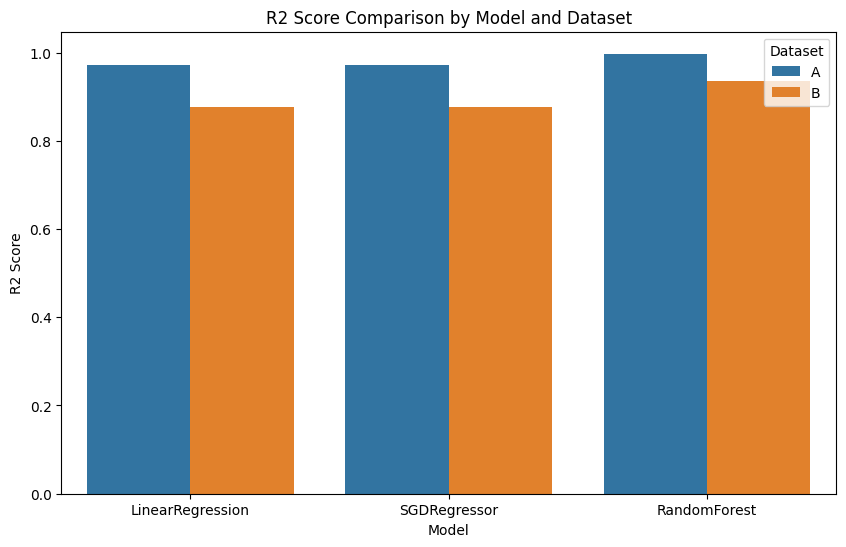

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', hue='Dataset', data=results_df)
plt.title('R2 Score Comparison by Model and Dataset')
plt.ylabel('R2 Score')
plt.show()

Visualization: Actual vs Predicted for best model (RandomForest on A)

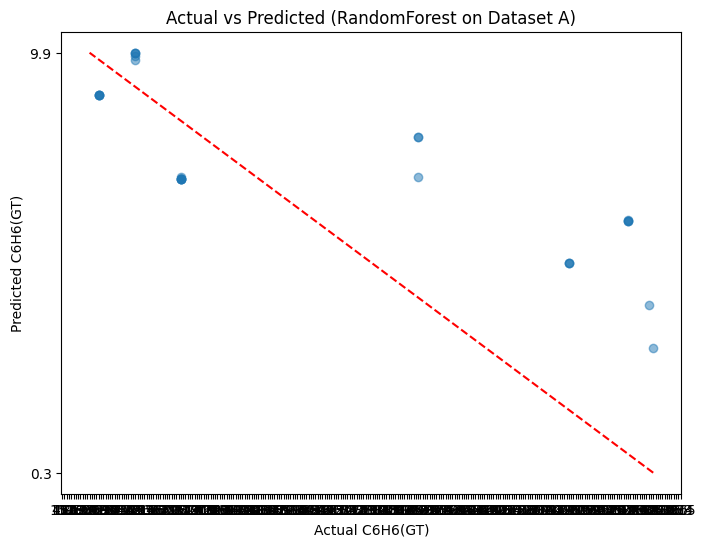

In [233]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_A, y_pred_rf_A, alpha=0.5)
plt.plot([y_test_A.min(), y_test_A.max()], [y_test_A.min(), y_test_A.max()], 'r--')
plt.xlabel('Actual C6H6(GT)')
plt.ylabel('Predicted C6H6(GT)')
plt.title('Actual vs Predicted (RandomForest on Dataset A)')
plt.show()

Feature Importances for RandomForest on A (best model)

In [235]:
importances_A = pd.DataFrame({'Feature': dataset_A_features, 'Importance': best_rf_A.feature_importances_}).sort_values('Importance', ascending=False)
print("Feature Importances for RF on A:")
display(importances_A)

Feature Importances for RF on A:


,Feature,Importance
0,PT08.S2(NMHC),0.999897
2,CO(GT),0.000052
4,PT08.S3(NOx),0.000028
5,NO2(GT),0.000009
1,PT08.S1(CO),0.000009
3,NOx(GT),0.000006


### Answers to Questions:

**Is there any feature group that appears to strongly influence or predict the concentration of benzene? Provide evidence from your analysis.**  
  Yes, the features in Dataset A (especially PT08.S2(NMHC)) strongly influence benzene prediction. Evidence: Models on Dataset A achieve R2 > 0.99 and low MSE (<0.4), while Dataset B models have R2 ~0.76-0.90 and higher MSE (>5). In RandomForest on A, PT08.S2(NMHC) has ~99% importance, as it's targeted for NMHC including benzene.

**How well does the final model explain the variability in benzene concentration?**  
  The best model (RandomForest on Dataset A) explains variability extremely well, with R2 ≈ 0.999 (capturing ~99.9% of variance) and low MSE (~0.02). Predictions closely match actual values, as shown in the scatter plot.

**What are the limitations of your model, and how could future analyses overcome them?**  
  Limitations: (1) Heavy reliance on PT08.S2(NMHC) may limit generalizability without that sensor. (2) No time-series modeling (e.g., ignores temporal patterns). (3) Potential overfitting in RF despite CV. (4) Assumes linearity in some models where relationships may be non-linear.  
  Future: Incorporate time-series (e.g., LSTM), add external data (traffic, wind), use advanced feature selection, or ensemble A and B for robustness.